# Jeux de données pour la classification des graphes : communes d'Europe

Objectif : classification du territoire européen à partir de graphes

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fiona
import os
pd.options.mode.chained_assignment = None

## Sélection des communes

Utiliser la base de données GISCO pour sélectionner des communes ayant une superficie proche.

In [2]:
communes_gdf = gpd.read_file("../data/raw_data/communes-euro/COMM_RG_01M_2016_3035.shp")

In [3]:
communes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 122750 entries, 0 to 122749
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   COMM_ID    122750 non-null  object  
 1   CNTR_ID    122750 non-null  object  
 2   CNTR_CODE  122749 non-null  object  
 3   COMM_NAME  122749 non-null  object  
 4   NAME_ASCI  122749 non-null  object  
 5   TRUE_FLAG  120583 non-null  object  
 6   NSI_CODE   120577 non-null  object  
 7   NAME_NSI   120149 non-null  object  
 8   NAME_LATN  122749 non-null  object  
 9   NUTS_CODE  120577 non-null  object  
 10  FID        122750 non-null  object  
 11  geometry   122750 non-null  geometry
dtypes: geometry(1), object(11)
memory usage: 11.2+ MB


In [4]:
communes_gdf.head()

,COMM_ID,CNTR_ID,CNTR_CODE,COMM_NAME,NAME_ASCI,TRUE_FLAG,NSI_CODE,NAME_NSI,NAME_LATN,NUTS_CODE,FID,geometry
0,AL0734,AL,AL,Pogradec,Pogradec,None,None,None,Pogradec,None,AL0734,"POLYGON ((5234384.813 2037413.214, 5231405.488..."
1,AL0735,AL,AL,Maliq,Maliq,None,None,None,Maliq,None,AL0735,"POLYGON ((5201749.637 2008471.011, 5199770.168..."
2,AL0736,AL,AL,Pustec,Pustec,None,None,None,Pustec,None,AL0736,"MULTIPOLYGON (((5234384.813 2037413.214, 52354..."
3,AL0737,AL,AL,Kolonjë,Kolonje,None,None,None,Kolonje,None,AL0737,"POLYGON ((5234331.624 1998545.391, 5235129.050..."
4,AL0738,AL,AL,Devoll,Devoll,None,None,None,Devoll,None,AL0738,"POLYGON ((5242658.644 2025967.847, 5242693.791..."


In [5]:
# suppression des DOM
communes_gdf = communes_gdf[communes_gdf['CNTR_ID'] == communes_gdf['COMM_ID'].str[:2]]

In [6]:
communes_gdf["surf_km2"] = communes_gdf.geometry.area / 1e6
communes_gdf['surf_km2'].describe()

count    113164.000000
mean         65.636060
std        3565.874131
min           0.000926
25%           7.185141
50%          15.257902
75%          33.394304
max      889250.031201
Name: surf_km2, dtype: float64

In [7]:
comm_per_country = communes_gdf.groupby('CNTR_ID')['surf_km2'].describe().sort_values(by='count', ascending=False)
comm_per_country

,count,mean,std,min,25%,50%,75%,max
CNTR_ID,,,,,,,,
FR,35308.0,15.547247,17.002648,0.016550,6.468670,10.894970,18.774156,757.245456
DE,11271.0,31.759359,40.438250,0.091208,8.175396,18.453132,39.531904,892.633021
ES,8204.0,61.677708,91.986456,0.000926,18.133837,34.573269,68.483381,1750.621970
IT,7983.0,37.661302,50.159126,0.103329,11.309811,22.113665,43.818120,1287.355816
CZ,6258.0,12.603589,15.955895,0.402975,4.770816,8.014791,14.315790,497.204079
SI,6034.0,3.359582,5.441203,0.017034,1.042632,1.926737,3.739665,164.613833
BG,4616.0,24.045555,24.136387,0.140342,10.313169,17.898164,29.712724,461.474210
IE,3441.0,20.325569,14.008650,0.045021,13.259053,19.347727,25.935442,126.488214
RO,3186.0,74.817478,55.625248,1.418047,42.070332,61.199704,88.390083,814.505044


In [8]:
min_communes_count = 1800
countries_selected = comm_per_country[comm_per_country['count'] > min_communes_count].index.values
communes_selected = communes_gdf[communes_gdf['COMM_ID'].str[:2].isin(countries_selected)]
communes_selected = communes_selected.sample(frac=1).groupby('CNTR_ID').nth(list(range(min_communes_count)))

In [ ]:
communes_selected = communes_selected.drop('FID', axis=1)

In [70]:
communes_selected.to_file("../data/communes/communes.gpkg", driver="GPKG")

## Extraction des zones de la BD Corine Land Cover

### Comparaison des BD Corine Land Cover et Communes


Regardons s'il est possible d'utiliser les surfaces des communes pour extraire les zones correspondantes dans la BD Corine Land Cover.

Pour ce faire, comparons le positionnement des surfaces des communes avec celles de Corine Land Cover.


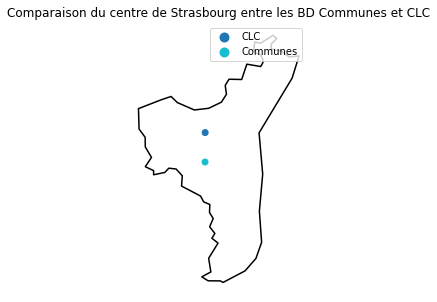

Distance entre les deux centres : 2021 m


In [9]:
strasbourg_communes = communes_gdf[communes_gdf['COMM_NAME'] == 'Strasbourg']
strasbourg_loc = gpd.tools.geocode("Strasbourg, France").to_crs(3035)

f, ax = plt.subplots(figsize=(10, 5))
strasbourg_communes.boundary.plot(ax=ax, color="black")
points_gdf = gpd.GeoDataFrame({"class": ["Communes", "CLC"],
                               "geometry": [strasbourg_communes.representative_point().iloc[0],
                                            strasbourg_loc.iloc[0].geometry]})
points_gdf.plot("class", legend=True, ax=ax)
ax.set_axis_off()
plt.title("Comparaison du centre de Strasbourg entre les BD Communes et CLC")
plt.show()

d = strasbourg_communes.representative_point().distance(strasbourg_loc.iloc[0].geometry).iloc[0]
print(f"Distance entre les deux centres : {int(d)} m")

Nous pouvons considérer que le positionnement des surfaces des communes coincide avec celles de Corine Land Cover. Ainsi, nous pouvons nous servir des surfaces des communes pour directement extraire les zones de la BD Corine Land Cover.

### Extraction à partir de la BD Communes

Essayons d'extraire de la BD CLC la commune de Strasbourg à partir de la surface présente dans la BD Commune.

In [10]:
clc_path = "../data/raw_data/clc/u2018_clc2018_v2020_20u1_geoPackage/DATA/U2018_CLC2018_V2020_20u1.gpkg"

In [11]:
legend = pd.read_csv("../data/raw_data/clc/u2018_clc2018_v2020_20u1_geoPackage/Legend/clc_legend.csv")

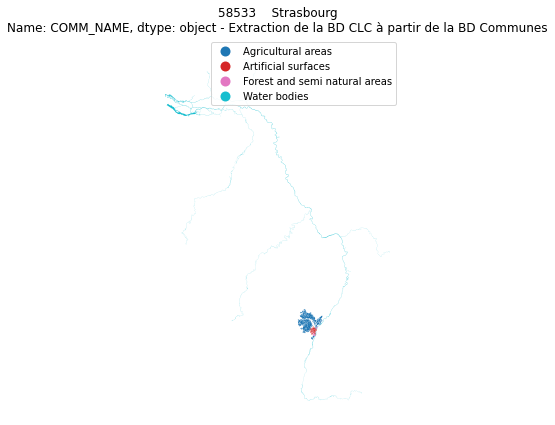

In [46]:
commune = communes_gdf[communes_gdf['COMM_NAME'] == 'Strasbourg']
commune_clc = gpd.read_file(clc_path, mask=commune["geometry"])
commune_clc["land_type"] = commune_clc["Code_18"].map(lambda x: legend[legend["CLC_CODE"] == int(x)]["LABEL1"].iloc[0])

f, ax = plt.subplots(figsize=(14, 7))
commune_clc.plot("land_type", legend=True, ax=ax)
ax.set_axis_off()
plt.title(f"{commune['COMM_NAME']} - Extraction de la BD CLC à partir de la BD Communes")
plt.show()

Le résultat n'est pas convaincant. Les aires de la BD de CLC peuvent être très grandes, ce qui peut entraîner l'extraction de plus d'information que celles concernant la commune souhaitée. Cela peut représenter un biais pour l'apprentissage.

Découpons la zone extraite à partir de la surface de la commune.

In [47]:
commune_clc_cropped = commune_clc.clip(commune['geometry'])

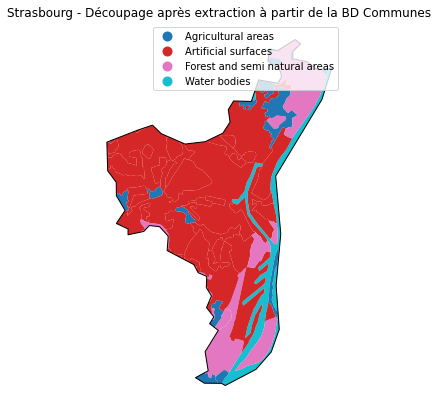

In [48]:
exterior = commune_clc_cropped.dissolve().exterior

f, ax = plt.subplots(figsize=(14, 7))
exterior.plot(ax=ax, color="black", linewidth=1)
commune_clc_cropped.plot("land_type", legend=True, ax=ax)
# gdf.representative_point().plot(ax=ax, color="black", alpha=0.5)
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Découpage après extraction à partir de la BD Communes")
ax.set_axis_off()
plt.show()

### Redéfinition des aires coupées

Le découpage des aires de CLC peut en séparer certaines en plusieurs parties distinctes. On souhaite alors les décomposer en instances séparées.

In [49]:
commune_clc_cropped['num'] = commune_clc_cropped['ID'].astype('category').cat.codes

In [50]:
multipolygons = commune_clc_cropped[commune_clc_cropped["geometry"].geom_type == "MultiPolygon"]
multipolygons.head()

,Code_18,Remark,Area_Ha,ID,geometry,land_type,num
2,211,None,30251.962925,EU_1045994,"MULTIPOLYGON (((4150444.111 2834229.012, 41504...",Agricultural areas,39
54,211,None,30325.121285,EU_1046258,"MULTIPOLYGON (((4159043.610 2838923.200, 41589...",Agricultural areas,40
3,121,None,50.508923,EU_1043472,"MULTIPOLYGON (((4151258.850 2830180.080, 41513...",Artificial surfaces,7
12,121,None,214.230356,EU_1043493,"MULTIPOLYGON (((4150560.330 2833545.580, 41506...",Artificial surfaces,14
16,121,None,151.625354,EU_1043507,"MULTIPOLYGON (((4151650.960 2834705.170, 41516...",Artificial surfaces,17


Nous pouvons décomposer les `MultiPolygon` en autant d'instances que de `Polygon` qui les composent.

In [51]:
commune_clc_exp = commune_clc_cropped.explode(index_parts=False)

In [52]:
commune_clc_exp["geometry"].geom_type.value_counts()

Polygon    77
dtype: int64

In [53]:
commune_clc_exp[commune_clc_exp["ID"] == "EU_596694"]

,Code_18,Remark,Area_Ha,ID,land_type,num,geometry


De cette manière, nous gardons en plus la trace du "parent" des sous-aires construites.

In [54]:
ids = multipolygons["ID"].tolist()
new_polygons = commune_clc_exp[commune_clc_exp["ID"].isin(ids)]

In [56]:
def plot_map_num(gdf, ax):
    assert ax is not None

    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]

    gdf.plot(np.array(range(0, len(gdf))), ax=ax)

    gdf.representative_point().plot(ax=ax, alpha=0.7, color="black", markersize=280)

    for _, row in gdf.iterrows():
        plt.annotate(row['num'], xy=row['coords'], horizontalalignment='center', verticalalignment='center', color="white")

    ax.set_axis_off()

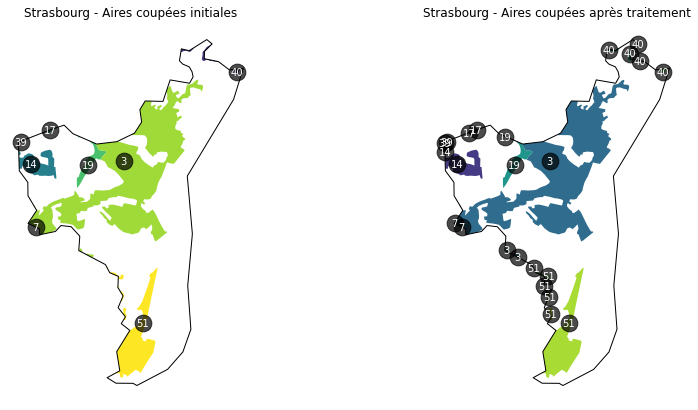

In [57]:
plt.figure(figsize=(14, 7))

ax = plt.subplot(121)
exterior.plot(ax=ax, color="black", linewidth=1)
plot_map_num(multipolygons, ax)
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Aires coupées initiales")

ax = plt.subplot(122)
exterior.plot(ax=ax, color="black", linewidth=1)
plot_map_num(new_polygons, ax)
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Aires coupées après traitement")

plt.show()

### Suppression des aires résiduelles après découpage

En découpant les aires de CLC, des petites aires résiduelles sont présentes aux extrémités de la carte. Deux possibilités : laisser comme tel ou les supprimer.

Voyons le résultat qu'on peut obtenir si on supprime les petites aires résiduelles suite au découpage des aires de CLC.

In [58]:
commune_clc["total_area"] = commune_clc.area
commune_clc = commune_clc.drop("Area_Ha", axis="columns")

commune_clc_clipped = commune_clc.clip(commune["geometry"])

commune_clc_clipped['num'] = commune_clc_clipped['ID'].astype('category').cat.codes

commune_clc_clipped = commune_clc_clipped.explode(index_parts=False)
commune_clc_clipped["object_proportion"] = commune_clc_clipped.area / commune_clc_clipped["total_area"]
commune_clc_clipped["total_proportion"] = commune_clc_clipped.area / commune_clc_clipped.area.sum()

In [59]:
commune_clc_clipped["total_area"]

0     8.411702e+08
2     1.817899e+06
2     3.025196e+08
54    3.025196e+08
54    5.050892e+05
          ...     
52    9.530670e+06
43    9.530670e+06
19    9.530670e+06
17    1.741032e+06
18    4.138217e+05
Name: total_area, Length: 77, dtype: float64

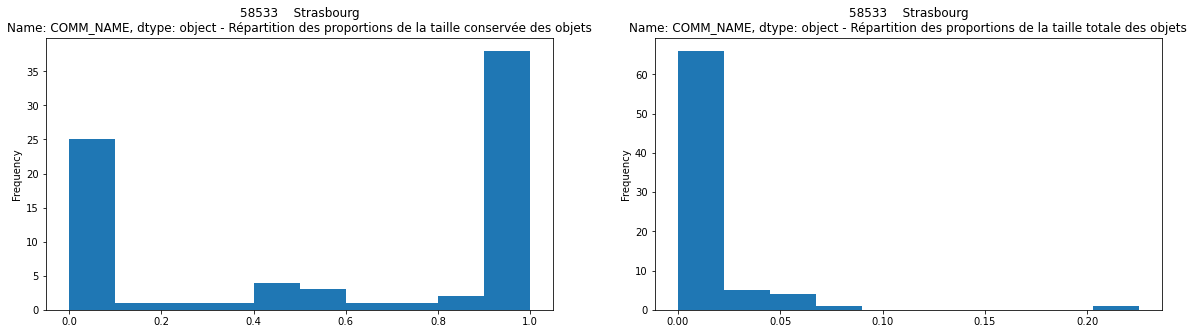

In [61]:
plt.figure(figsize=(20, 5))

ax = plt.subplot(121)
commune_clc_clipped["object_proportion"].plot.hist(ax=ax)
plt.title(f"{commune['COMM_NAME']} - Répartition des proportions de la taille conservée des objets")

ax = plt.subplot(122)
commune_clc_clipped["total_proportion"].plot.hist(ax=ax)
plt.title(f"{commune['COMM_NAME']} - Répartition des proportions de la taille totale des objets")

plt.show()

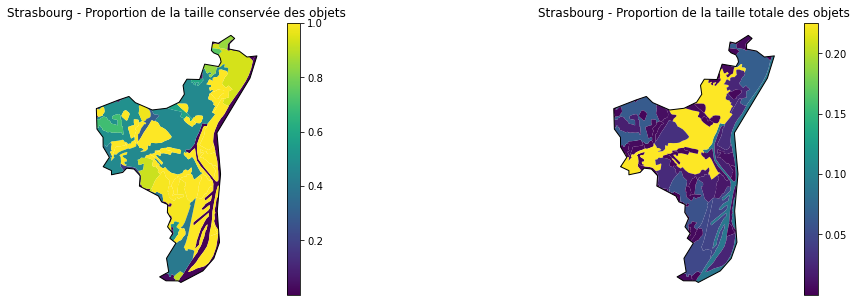

In [62]:
plt.figure(figsize=(17, 5))

ax = plt.subplot(121)
exterior.plot(ax=ax, color="black", linewidth=1)
commune_clc_clipped.plot("object_proportion", legend=True, ax=ax)
ax.set_axis_off()
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Proportion de la taille conservée des objets")

ax = plt.subplot(122)
exterior.plot(ax=ax, color="black", linewidth=1)
commune_clc_clipped.plot("total_proportion", legend=True, ax=ax)
ax.set_axis_off()
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Proportion de la taille totale des objets")

plt.show()

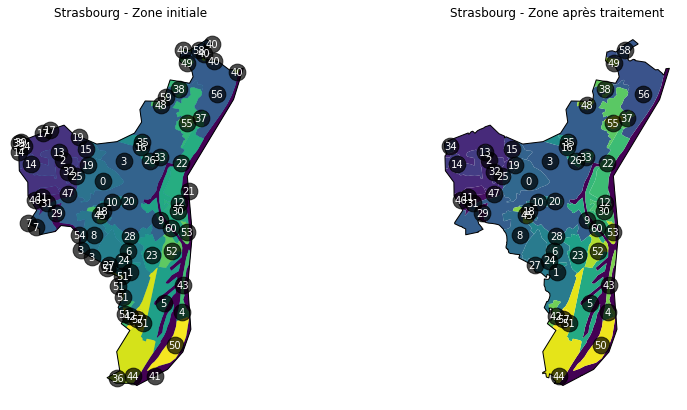

In [63]:
# residus = commune_clc_clipped[
#     (commune_clc_clipped["object_proportion"] < 0.20) & (commune_clc_clipped["total_proportion"] < 0.01)]
communes_clc_bis = commune_clc_clipped[
    (commune_clc_clipped["object_proportion"] >= 0.20) | (commune_clc_clipped["total_proportion"] >= 0.01)]

plt.figure(figsize=(14, 7))

ax = plt.subplot(121)
exterior.plot(ax=ax, color="black", linewidth=1)
commune_clc_clipped.plot(ax=ax)
plot_map_num(commune_clc_clipped, ax=ax)
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Zone initiale")

ax = plt.subplot(122)
communes_clc_bis.dissolve().exterior.plot(ax=ax, color="black", linewidth=1)
plot_map_num(communes_clc_bis, ax=ax)
plt.title(f"{commune['COMM_NAME'].iloc[0]} - Zone après traitement")

plt.show()

Le résultat semble intéressant. Nous utiliserons cette méthode d'extraction pour l'apprentissage.